<a href="https://colab.research.google.com/github/Aomaphisara/bsc_dpdm22/blob/main/%5Bdataprap3%5D_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Normalization-Standardization
https://scikit-learn.org/stable/modules/preprocessing.html

#ใช้ข้อมูล data กรมอุตุ

In [1]:
#เชื่อม google drive 
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/BPDM')

In [3]:
import pandas as pd  

In [4]:
weather_data = pd.read_csv('/content/drive/MyDrive/BPDM/Group_Quiz.csv')

In [5]:
weather_data.head()

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1


In [6]:
weather_data.shape

(8169, 12)

In [7]:
data_features = weather_data.iloc[:,5:]
data_features.head()

,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,83,3,9,1.4,24.2,27.6,24.8
1,92,2,10,17.7,24.0,25.6,23.0
2,86,3,10,3,22.9,25.6,22.1
3,80,2,8,0,21.9,25.8,22.8
4,86,2,10,2.2,21.7,24.3,23.1


In [8]:
data_features.dtypes

ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิตุ้ม          float64
อุณหภูมิต่ำสุด         object
dtype: object

In [9]:
data_features.describe()

,ความชื้นสัมพัทธ์,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม
count,8169.000000,8169.000000,8169.000000
mean,69.798262,18.151916,24.868405
std,8.870501,3.775475,2.846185
min,38.000000,1.500000,11.800000
25%,64.000000,15.800000,23.300000
50%,69.000000,18.400000,25.300000
75%,75.000000,21.000000,27.000000
max,99.000000,28.400000,31.000000


In [19]:
data_features[data_features.eq('-').any(1)]

,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด


In [11]:
data_features[data_features['ความเร็วลม'].eq('-')]

,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
1079,87,-,-,53.3,23.5,25.8,24.5
1122,61,-,-,-,19.7,28.5,22.7
1773,73,-,4,0,20.2,25.6,20
1776,89,-,7,1.2,22.0,24.2,21.1
1856,73,-,4,0,23.9,29.7,24.9
1862,70,-,6,0,21.0,27.5,22.2
1927,65,-,2,0,15.0,22.7,15.3
1995,67,-,1,-,19.4,26.5,20.6
2063,68,-,-,-,14.0,21.0,-
2125,72,-,8,0,21.3,27.1,23.0


In [12]:
weather_data[weather_data.eq('-').any(1)]

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
305,ขอนแก่น,3,10,2013,1009.88,78,4,4,-,23.5,27.9,24.3
306,ขอนแก่น,4,10,2013,1009.47,73,2,2,-,21.9,27.5,23.7
307,ขอนแก่น,5,10,2013,1008.08,69,3,3,-,20.7,27.3,22.5
308,ขอนแก่น,6,10,2013,1008.35,72,5,5,-,21.3,27.1,22.8
309,ขอนแก่น,7,10,2013,1009.30,72,2,2,-,21.3,27.0,23.5
...,...,...,...,...,...,...,...,...,...,...,...,...
8134,เลย,25,1,2021,1011.66,72,1,-,0,15.6,23.9,15.0
8135,เลย,26,1,2021,1011.62,73,2,-,0,15.7,23.2,15.0
8140,เลย,31,1,2021,1015.28,74,2,1,-,15.2,22.6,-
8161,เลย,21,2,2021,1013.57,68,1,-,0,15.2,23.2,14.0


In [20]:
data_features= data_features[data_features.eq('-').any(1)==False]
data_features.shape

(5208, 7)

In [21]:
data_features = data_features[data_features.eq('T').any(1)==False]
data_features.shape

(5061, 7)

In [23]:
data_features['ความเร็วลม']= data_features['ความเร็วลม'].astype(float)
data_features['จำนวนเมฆ']= data_features['จำนวนเมฆ'].astype(float)
data_features['ปริมาณฝน']= data_features['ปริมาณฝน'].astype(float)
data_features['อุณหภูมิต่ำสุด']= data_features['อุณหภูมิต่ำสุด'].astype(float)

In [24]:
data_features.describe()

,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,70.438253,2.284726,3.308832,1.556194,18.420944,25.002667,19.933570
std,9.433792,1.209540,2.494353,6.816712,3.630472,2.720534,3.295887
min,38.000000,0.000000,0.000000,0.000000,1.500000,11.800000,6.800000
25%,64.000000,1.000000,1.000000,0.000000,16.100000,23.500000,17.900000
50%,69.000000,2.000000,3.000000,0.000000,18.500000,25.400000,20.300000
75%,77.000000,3.000000,5.000000,0.000000,21.200000,26.900000,22.500000
max,99.000000,10.000000,10.000000,112.400000,28.400000,31.000000,26.700000


In [25]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[12,12] #กำหนดขนาดของ figure

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3639 missing from current font.
  font.set_text(s

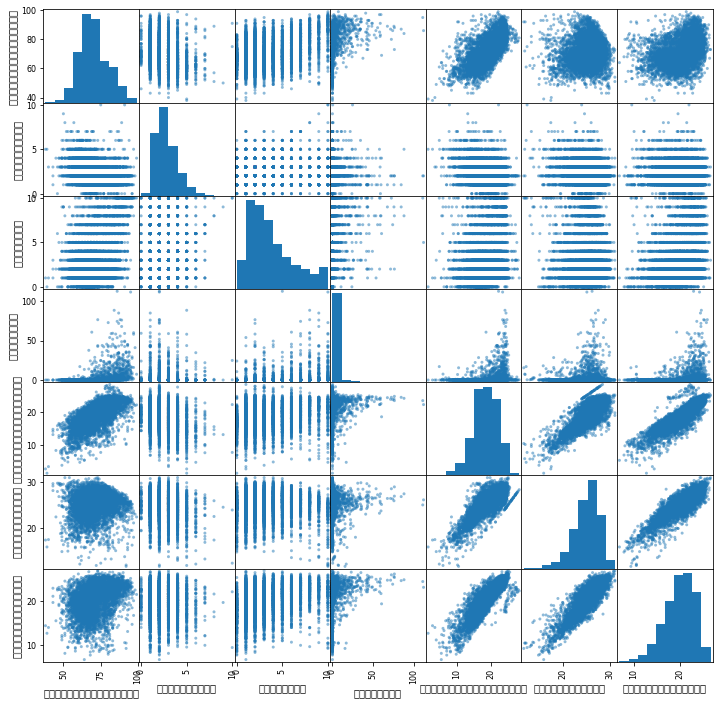

In [26]:
pd.plotting.scatter_matrix(data_features);

In [30]:
from matplotlib import pyplot as plt

In [34]:
plt.hist(data_features['ความกด']);

KeyError: ignored

In [29]:
scaler.fit(data_features) #predicct-transform
data_features_s = scaler.transform(data_features)

NameError: ignored

#Discritization

In [39]:
home_data = pd.read_csv('/content/drive/MyDrive/BPDM/อภิสรา ปราบนอก(1).csv')

In [40]:
home_data.head()

,Unnamed: 0,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4


In [ ]:
home_data= home_data.drop('Unnamed: 0', axis=1)

In [47]:
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4


#แปลงค่า sell_price
- ราคาต่ำกว่า 500k ให้เป็น 1
-ราคาระหว่าง 500k-1m ให้เป็น 2
-ราคา 1m ขึ้นไปให้เป็น 3 

In [ ]:
home_data[home_data['sell_price']>50000000]

# one-hot-Encoder

In [52]:
home_data_dummies = pd.get_dummies(home_data,columns=['zone'])

In [53]:
home_data_dummies

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,d1250-7/11,d1500-7/11,zone_1,zone_กลางเมือง-เมืองเก่า-กุดกว้าง,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,2,3,0,0,0,0,0,0,1,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,10,14,0,0,0,0,1,0,0,0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,4,9,0,0,0,0,0,0,1,0
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
